## Part 4 Clustering Analysis

## 4.1 K-Means

### 4.1.1 Preprocessing

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd
import plotly.express as px
import re

In [80]:
# r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined/combined_cdc_r_v_u_df.csv'
# cdc_20_21_stat = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

cdc_all = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined/combined_cdc_r_v_u_df.csv', encoding = "UTF-8")
#cdc_20_21 = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

In [81]:
cdc_all['GeoLocation']

0           AK | ALEUTIANS EAST BOROUGH
1       AK | ALEUTIANS WEST CENSUS AREA
2           AK | ANCHORAGE MUNICIPALITY
3               AK | BETHEL CENSUS AREA
4              AK | BRISTOL BAY BOROUGH
                     ...               
3071                    WY | SWEETWATER
3072                         WY | TETON
3073                         WY | UINTA
3074                      WY | WASHAKIE
3075                        WY | WESTON
Name: GeoLocation, Length: 3076, dtype: object

In [82]:
#cdc_all['State'] = cdc_all['GeoLocation'].str.split(' | ')[0]
#splited_df = cdc_all['GeoLocation'].str.split('|', expand=True)
#cdc_all['State'], cdc_all['County'] = zip(*[(x.strip(), y.strip() if y else None) 
#                                  for x, y in cdc_all['GeoLocation'].str.split('|', n=1, expand=True)])

cdc_all[['State', 'County']] = cdc_all['GeoLocation'].str.split('|', expand=True)


In [83]:
cdc_all['State'] = cdc_all['State'].str.strip()
cdc_all['County'] = cdc_all['County'].str.strip()

In [ ]:
cdc_all.columns

In [87]:
cdc_cluster = cdc_all.drop(columns=['Location','GeoLocation', 'GEOID','Rural_Pop_Percent', 'Urban_Housing_Percent', 'Rural_Housing_Percent', 'State', 'County'])

In [88]:
cdc_cluster.columns = cdc_cluster.columns.str.replace(' ', '_')
cdc_cluster.columns = cdc_cluster.columns.str.replace('(', '_')
cdc_cluster.columns = cdc_cluster.columns.str.replace(')', '_')
cdc_cluster.columns = cdc_cluster.columns.str.replace(',', '_')
cdc_cluster.columns = cdc_cluster.columns.str.replace('>=', 'GE')
cdc_cluster.columns = cdc_cluster.columns.str.replace('-', 'to')

### 4.1.2 Cleaned k means:

In [85]:
def plot_n_Silhouette(n_cluster_input):
    from sklearn.cluster import KMeans

    kmeans_all_n = KMeans(n_clusters= n_cluster_input, random_state=59000, n_init="auto").fit(cdc_cluster)
    kmeans_all_n.labels_
    cdc_all['KMeans_n_cluster'] = kmeans_all_n.labels_

    import sklearn.metrics as sklm
    #cdc_kMeans_HO_cluster = kmeans_all.labels_
    # These lines calculate the silhouette score...
    silhouette_kmeans = sklm.silhouette_score(cdc_cluster, cdc_all['KMeans_n_cluster'])

    # ... and print it:
    print("Silhouette Score:", silhouette_kmeans, "Number of clusters", n_cluster_input)


    plt.figure(figsize=(40, 10))

    plt.scatter(cdc_all['State'], cdc_all['Coronary heart disease among adults aged >=18 years'], c= kmeans_all_n.labels_,cmap='viridis',s=50)

    #plt.xlim(2, 15)
    #plt.ylim(-5, 105) 
    plt.ylim(2, 13) 
    plt.xlabel('State')
    #plt.xlabel('CHD Prevalence')
    plt.ylabel('CHD Prevalence')
    #plt.ylabel('Urban Pop Percentage')

Silhouette Score: 0.45752207880716317 Number of clusters 2


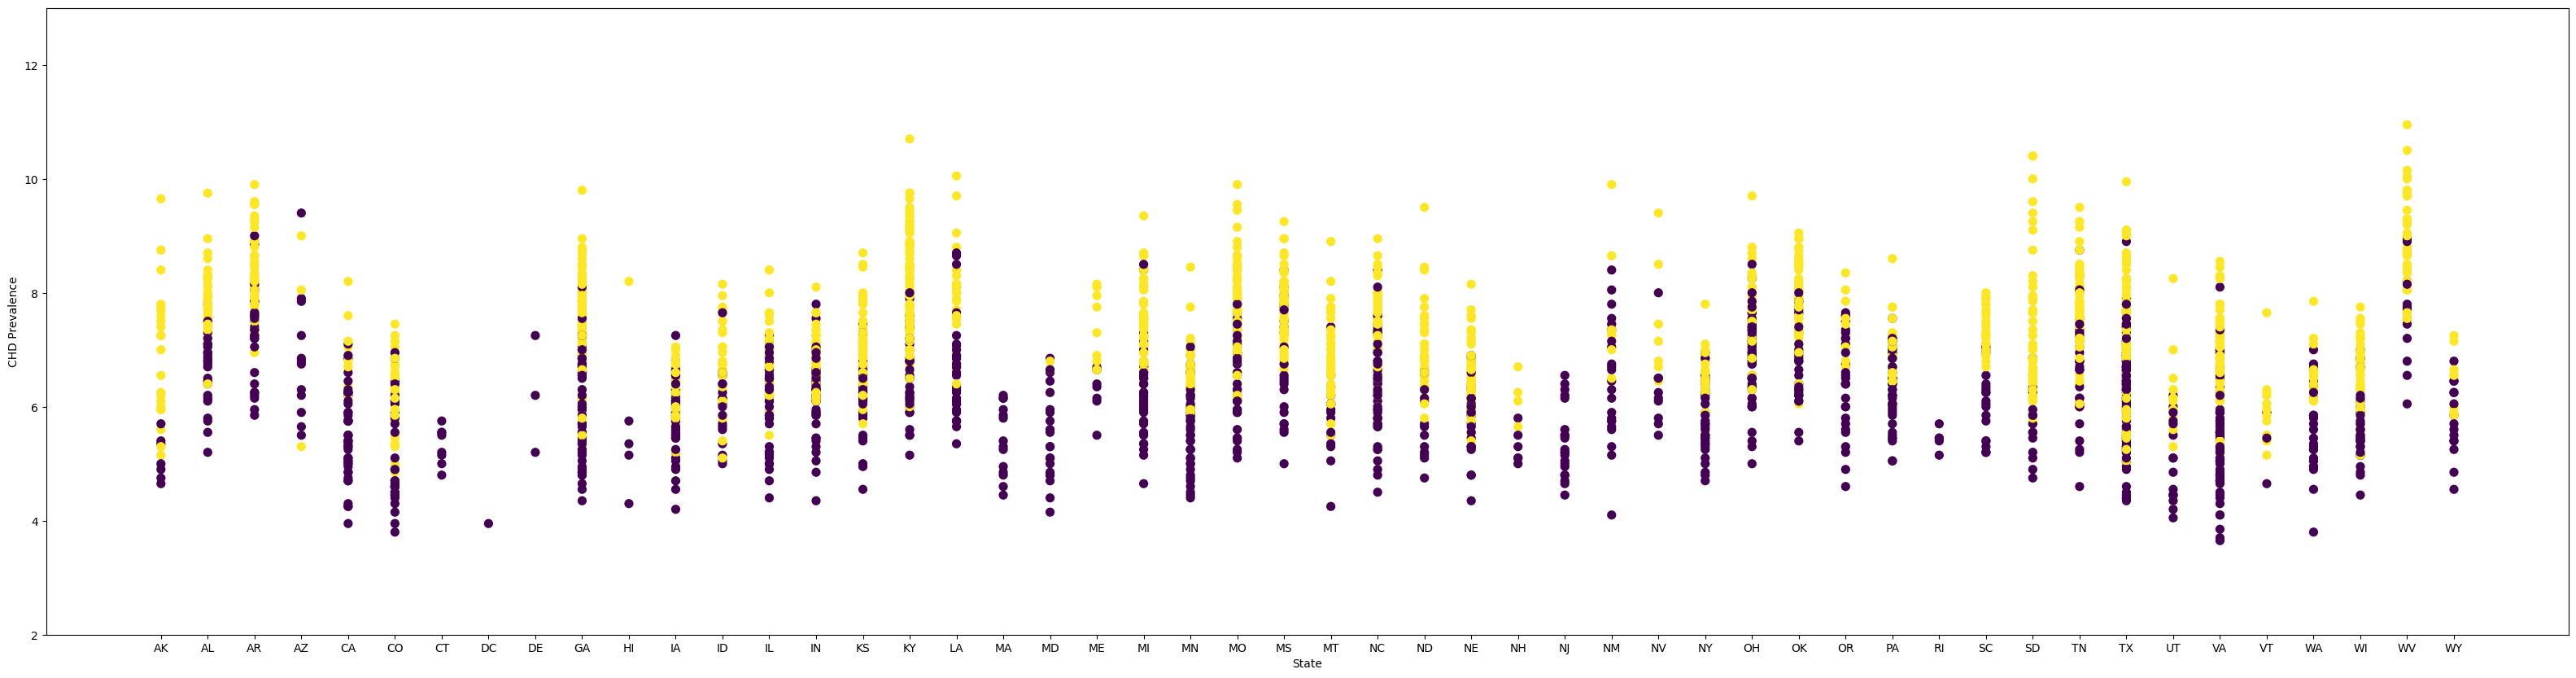

Silhouette Score: 0.34795054032220935 Number of clusters 3


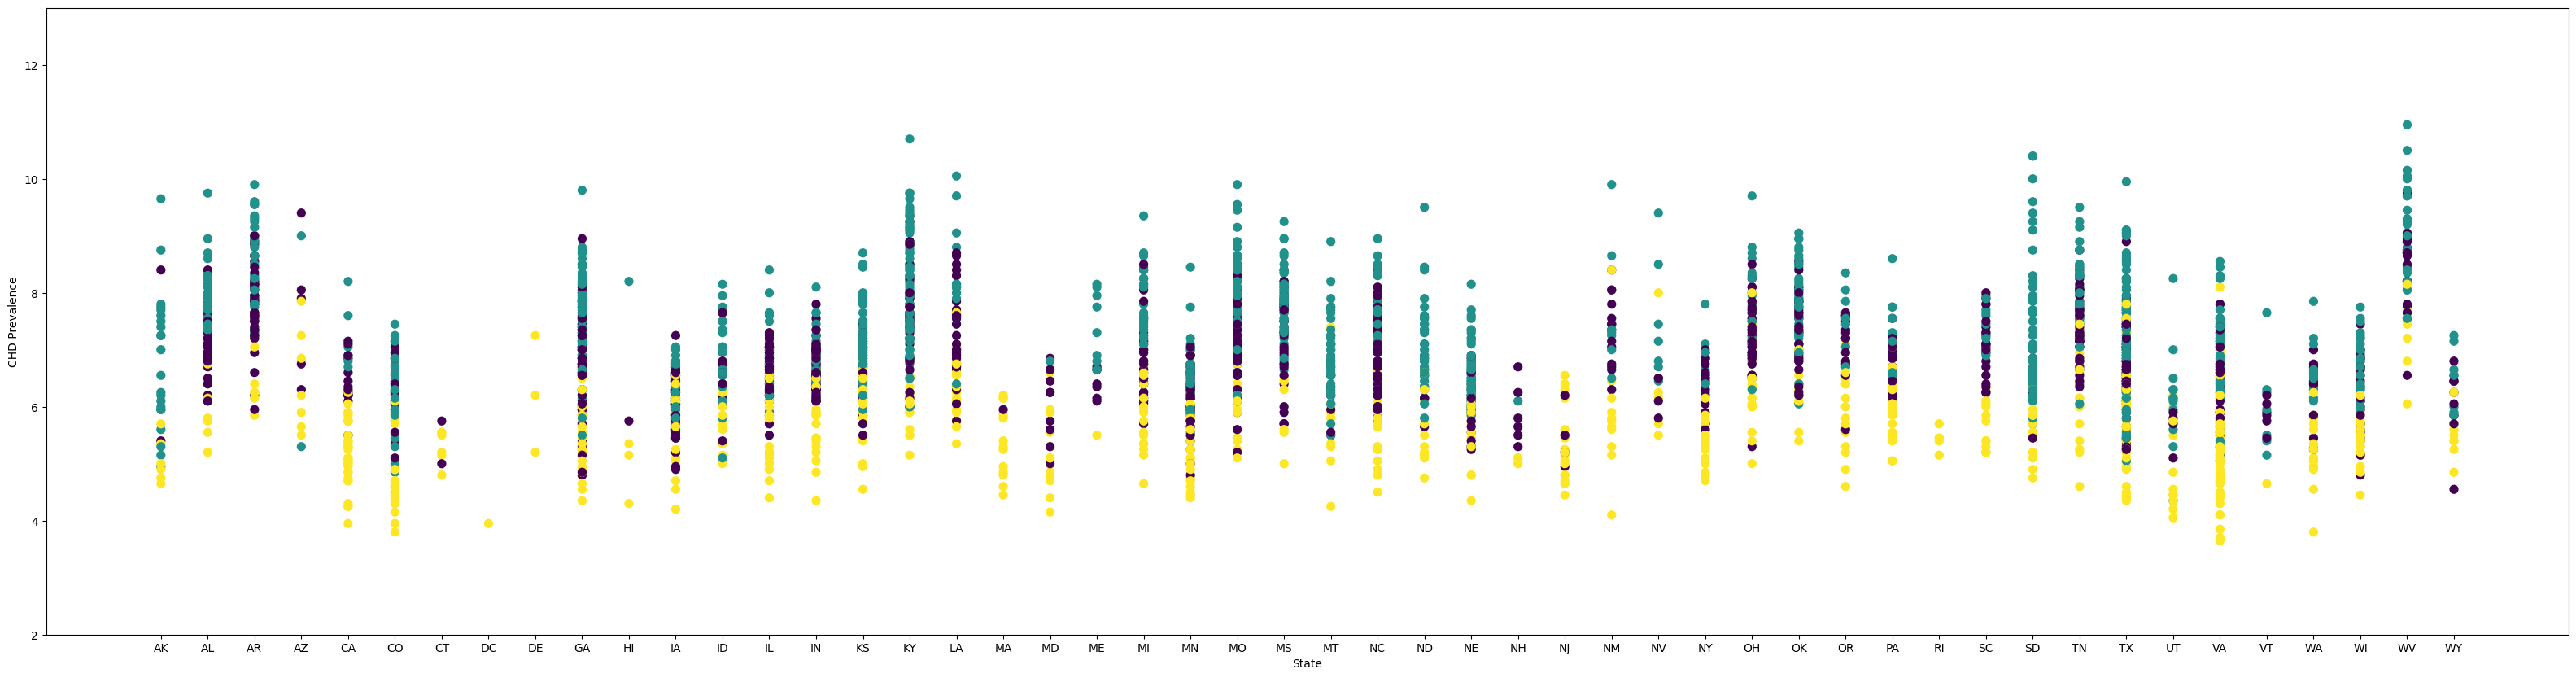

Silhouette Score: 0.29799199594374687 Number of clusters 4


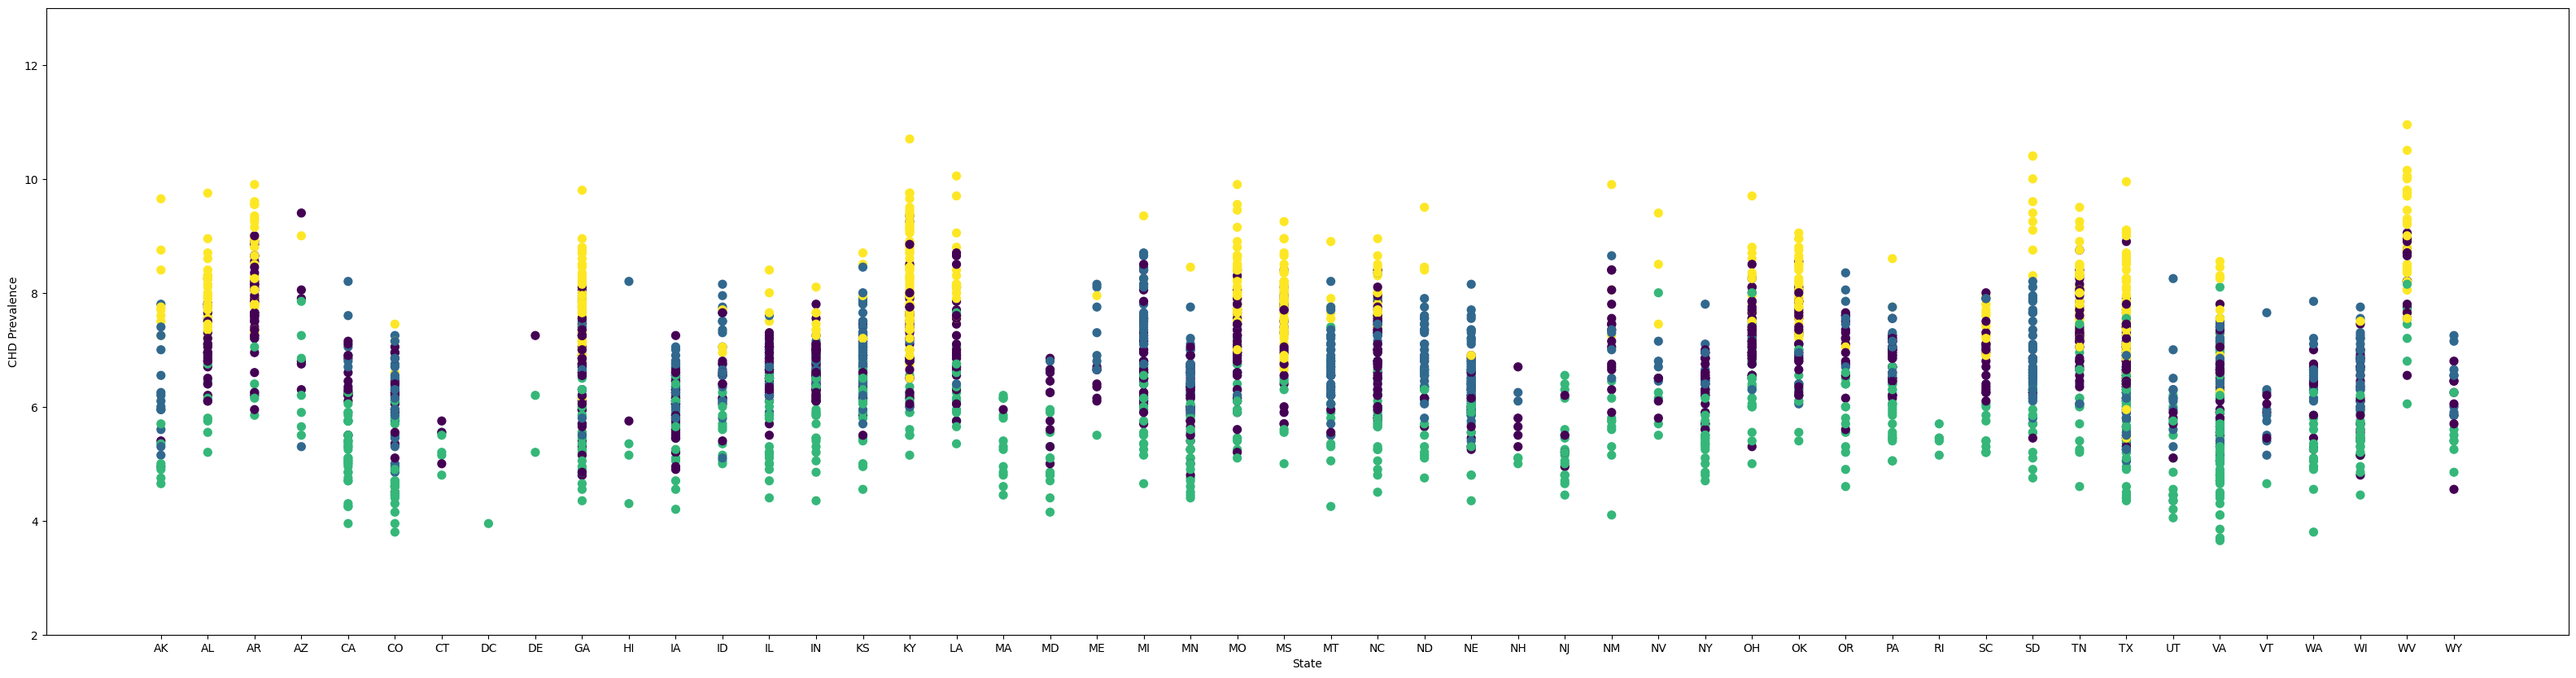

Silhouette Score: 0.26084698255765487 Number of clusters 5


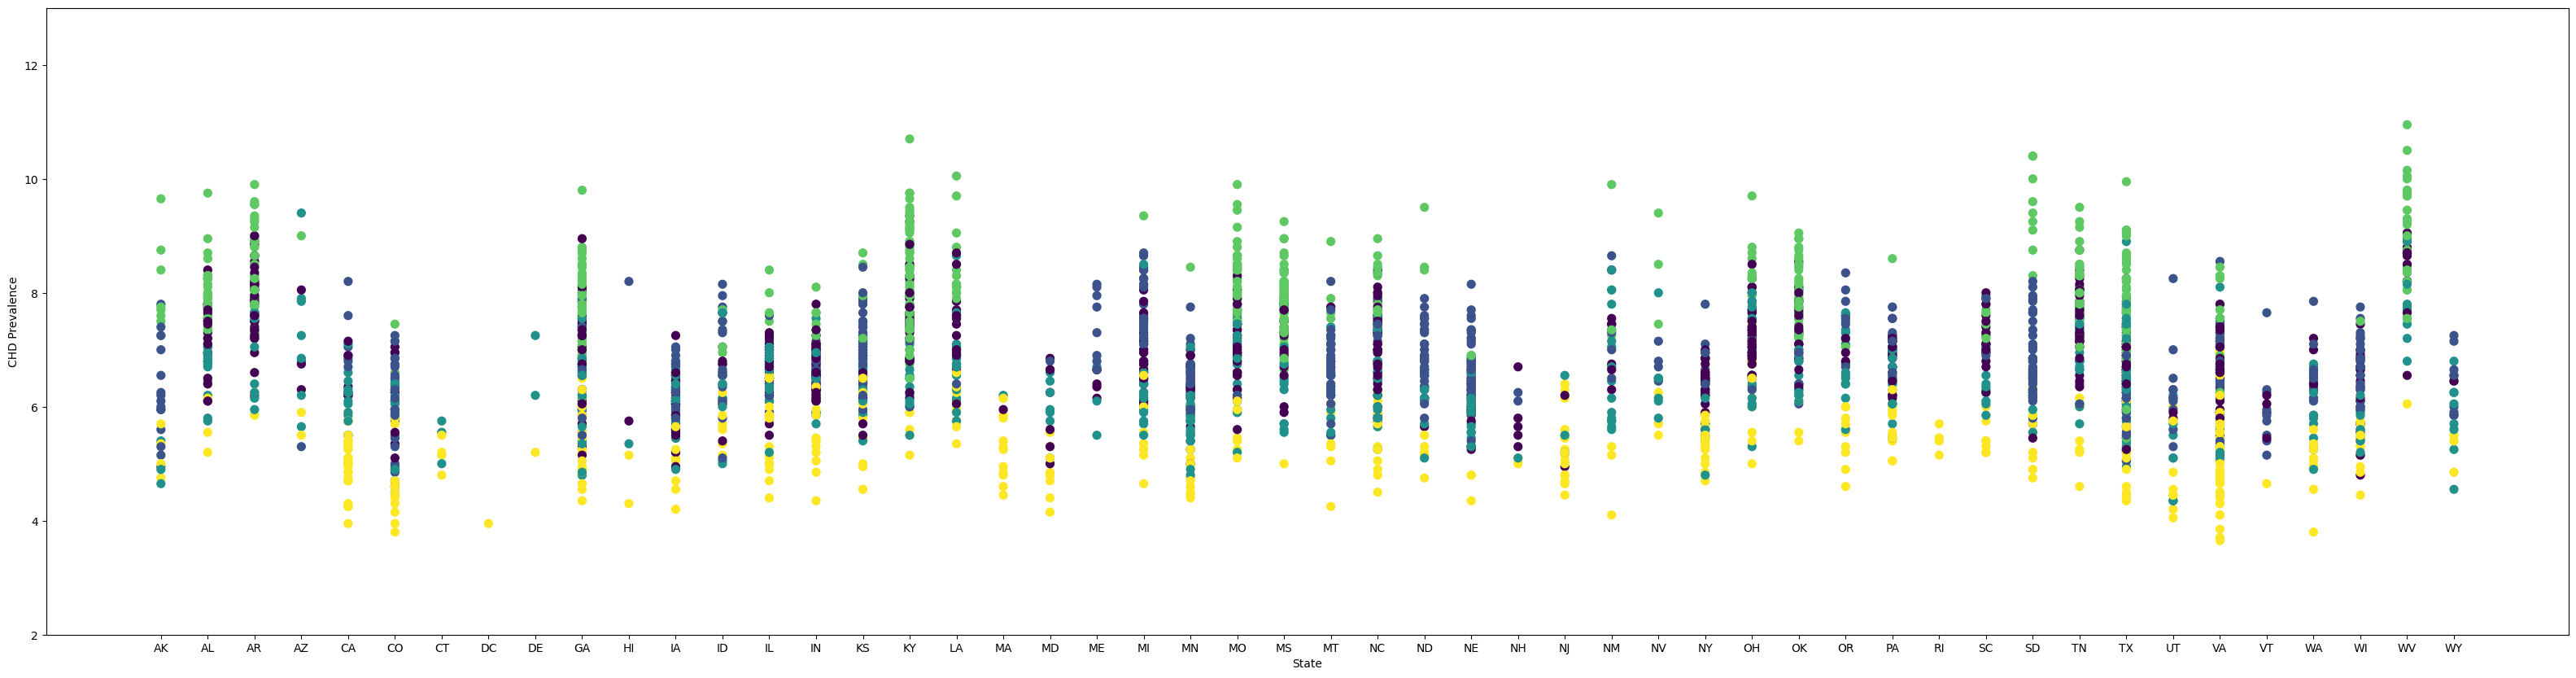

Silhouette Score: 0.2673529673042229 Number of clusters 6


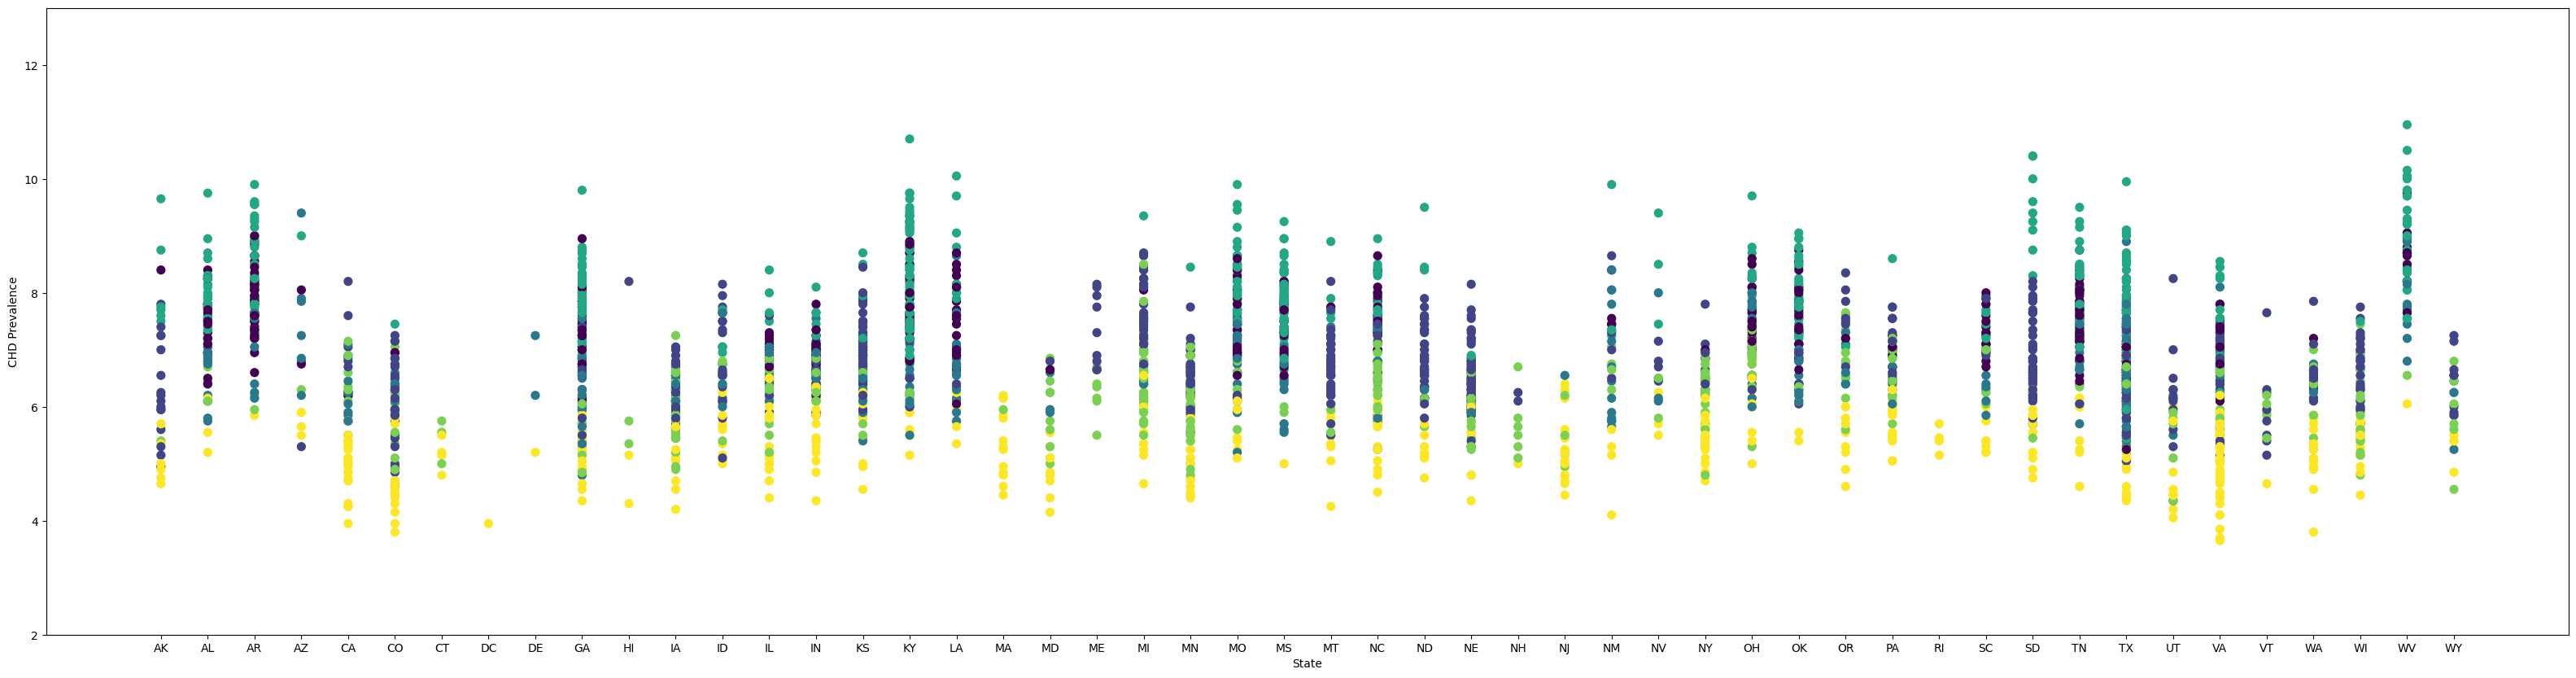

Silhouette Score: 0.25371580621493983 Number of clusters 7


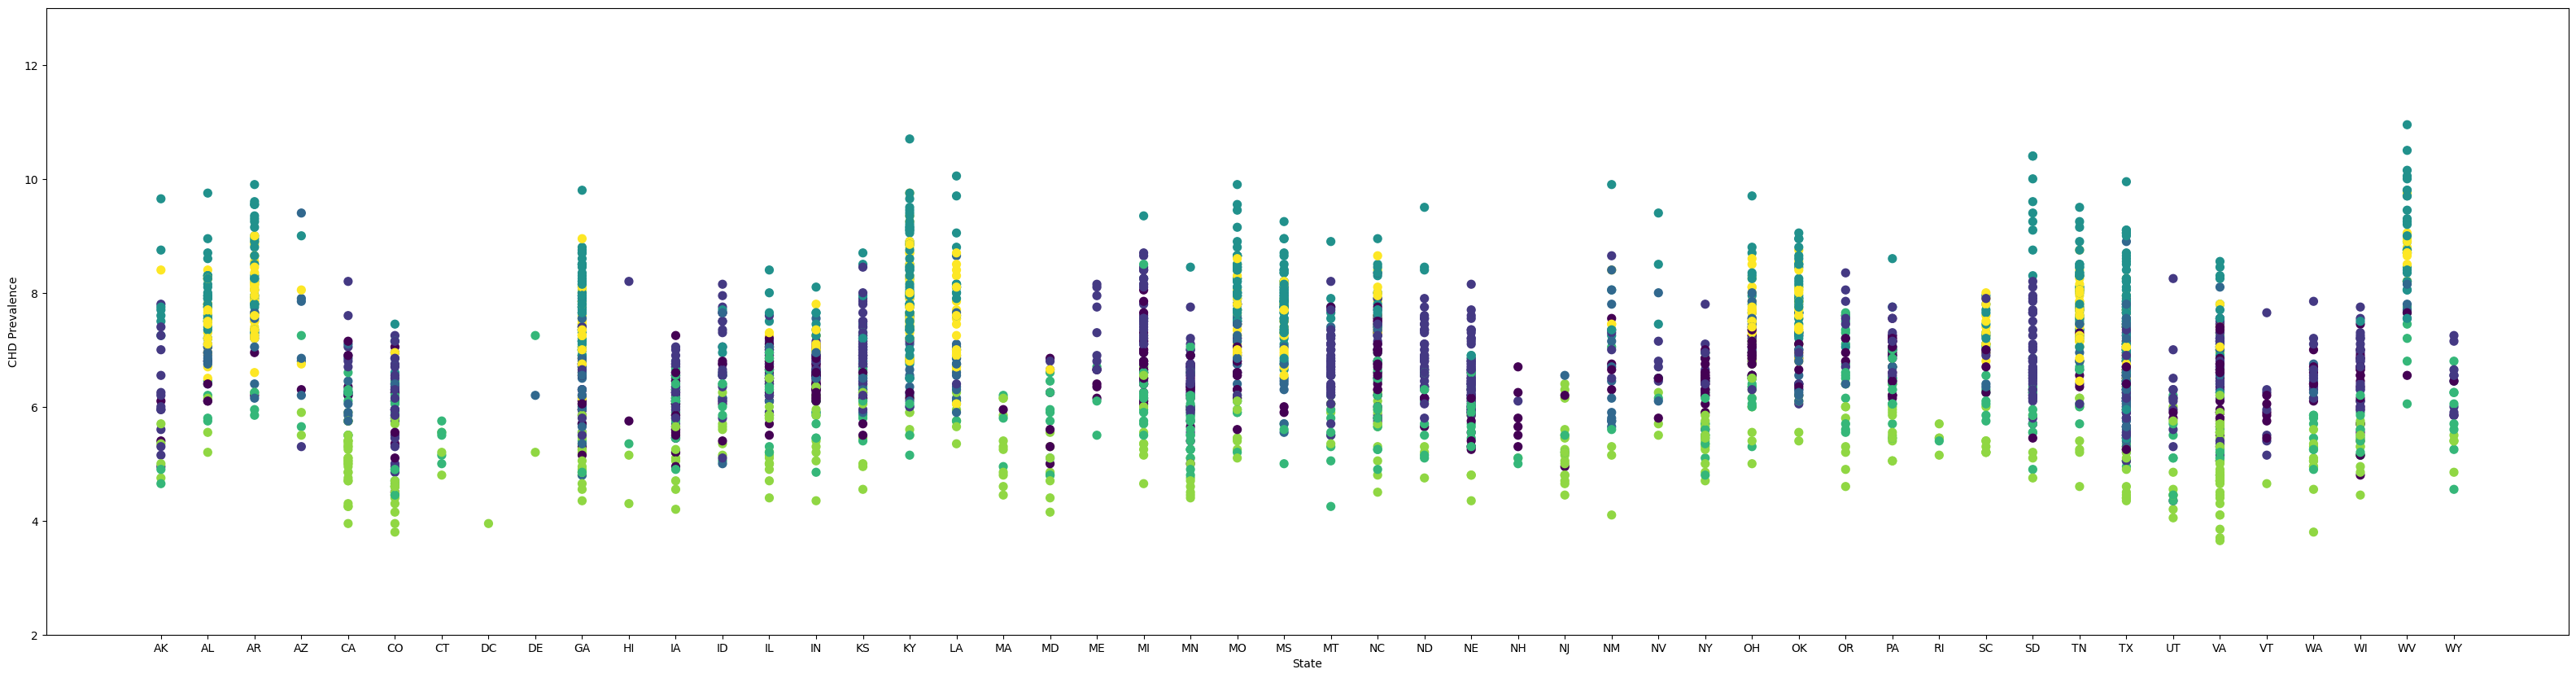

Silhouette Score: 0.24235182884048 Number of clusters 8


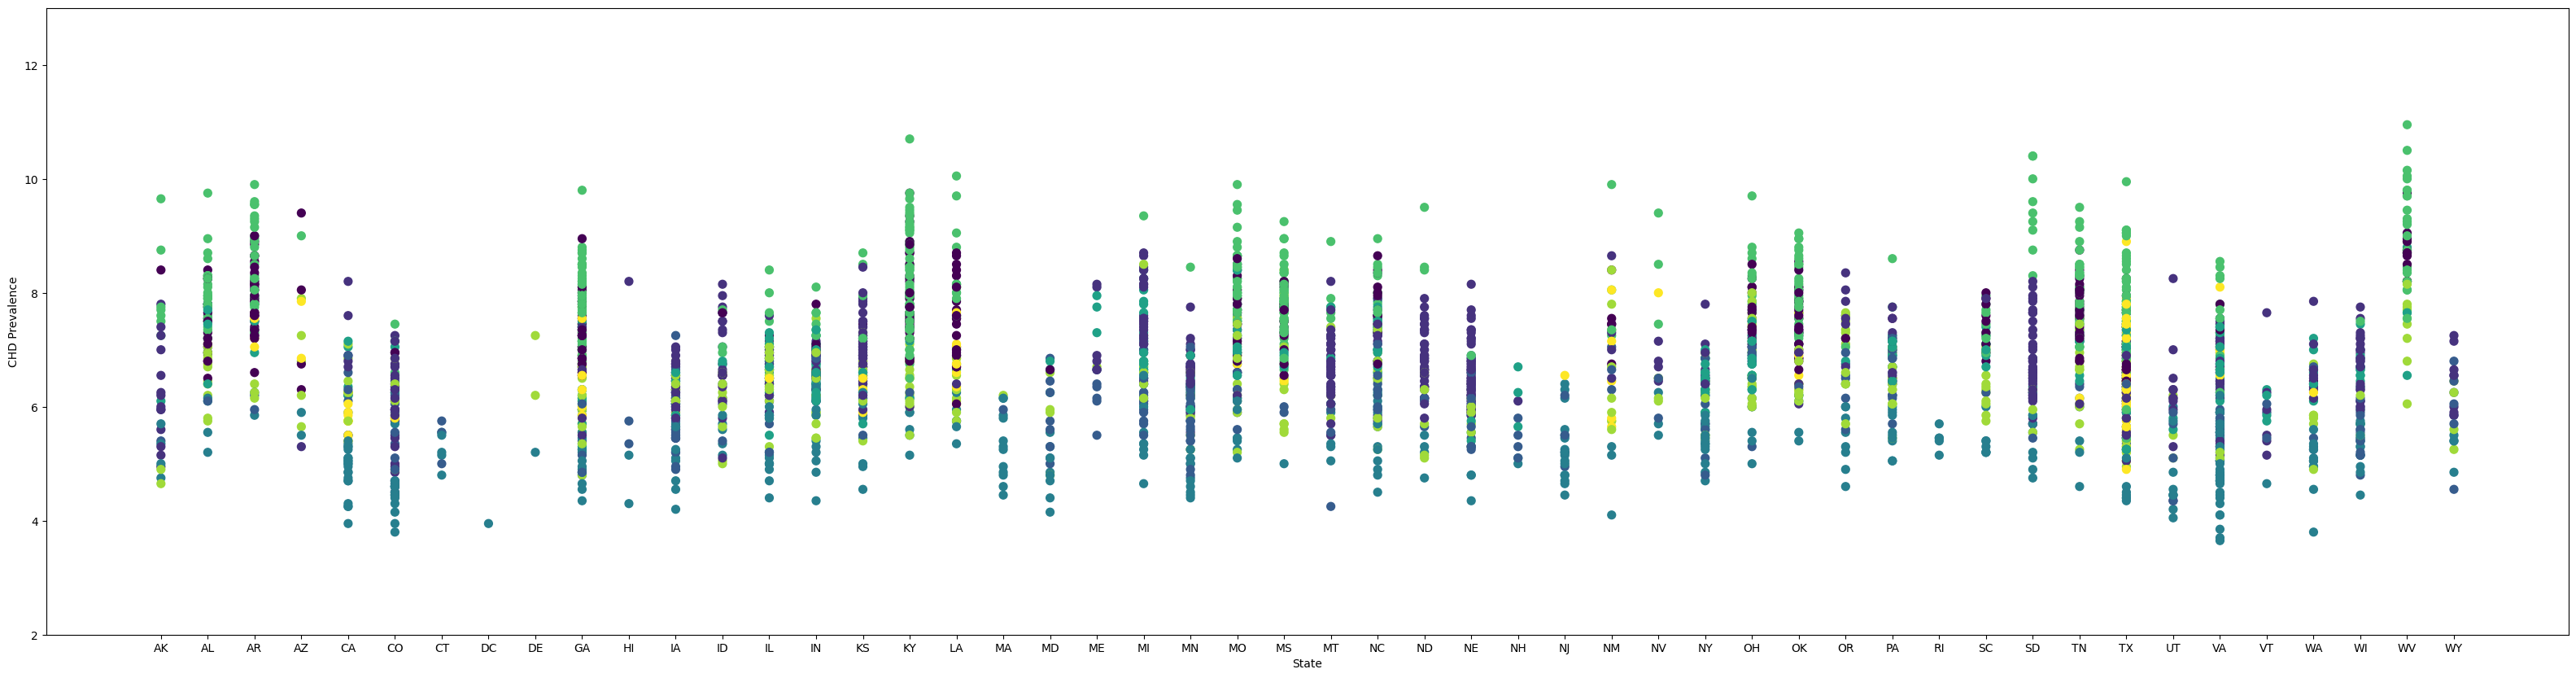

Silhouette Score: 0.2047912870308261 Number of clusters 9


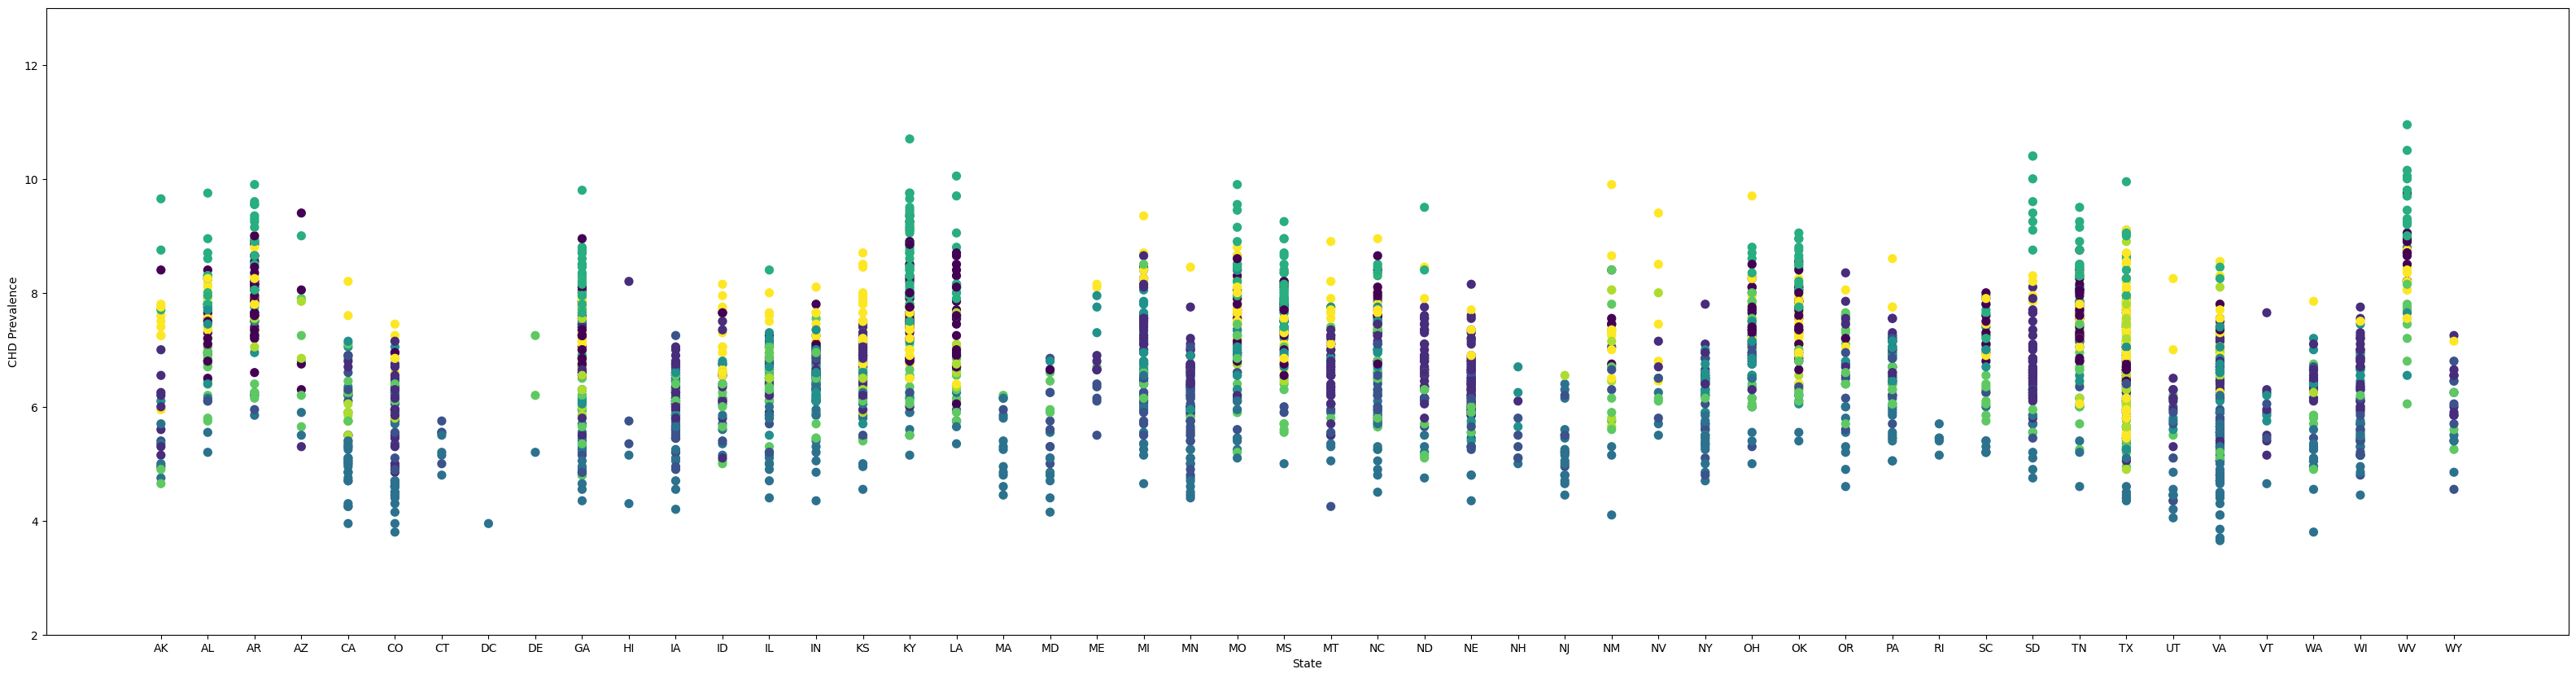

In [86]:
for i in range(2, 10):
    plot_n_Silhouette(i)
    plt.show()
    

## 4.2 Hierarchical Clustering

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [90]:
# Example using Euclidean distance and Ward linkage
h_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [94]:
hcluster_labels = h_cluster.fit_predict(cdc_cluster)

/home/mengyuwsl/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


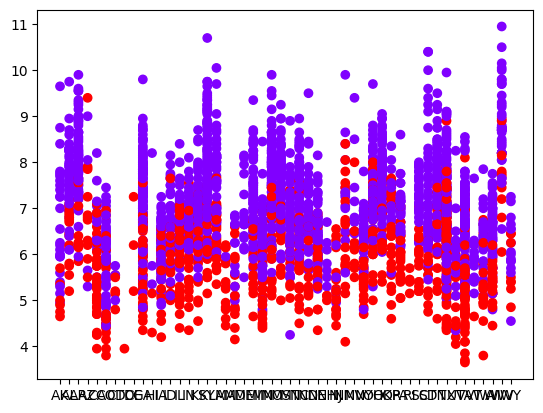

In [96]:
# Plotting
plt.scatter(cdc_all['State'], cdc_all['Coronary heart disease among adults aged >=18 years'], c=h_cluster.labels_, cmap='viridis',s=50)
plt.show()

In [108]:
ncluster_h = 2

# Example using Euclidean distance and Ward linkage
h_cluster = AgglomerativeClustering(n_clusters=ncluster_h, affinity='euclidean', linkage='ward')

hcluster_labels = h_cluster.fit_predict(cdc_cluster)
import sklearn.metrics as sklm

# These lines calculate the silhouette score...
silhouette_hcluster = sklm.silhouette_score(cdc_cluster, hcluster_labels)

# ... and print it:
print("Silhouette Score:", silhouette_hcluster, "Number of clusters", ncluster_h)

/home/mengyuwsl/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score: 0.41140403037422174 Number of clusters 2


In [117]:
cdc_cluster.columns

Index(['All_teeth_lost_among_adults_aged_GE65_years',
       'Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',
       'Any_disability_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_a

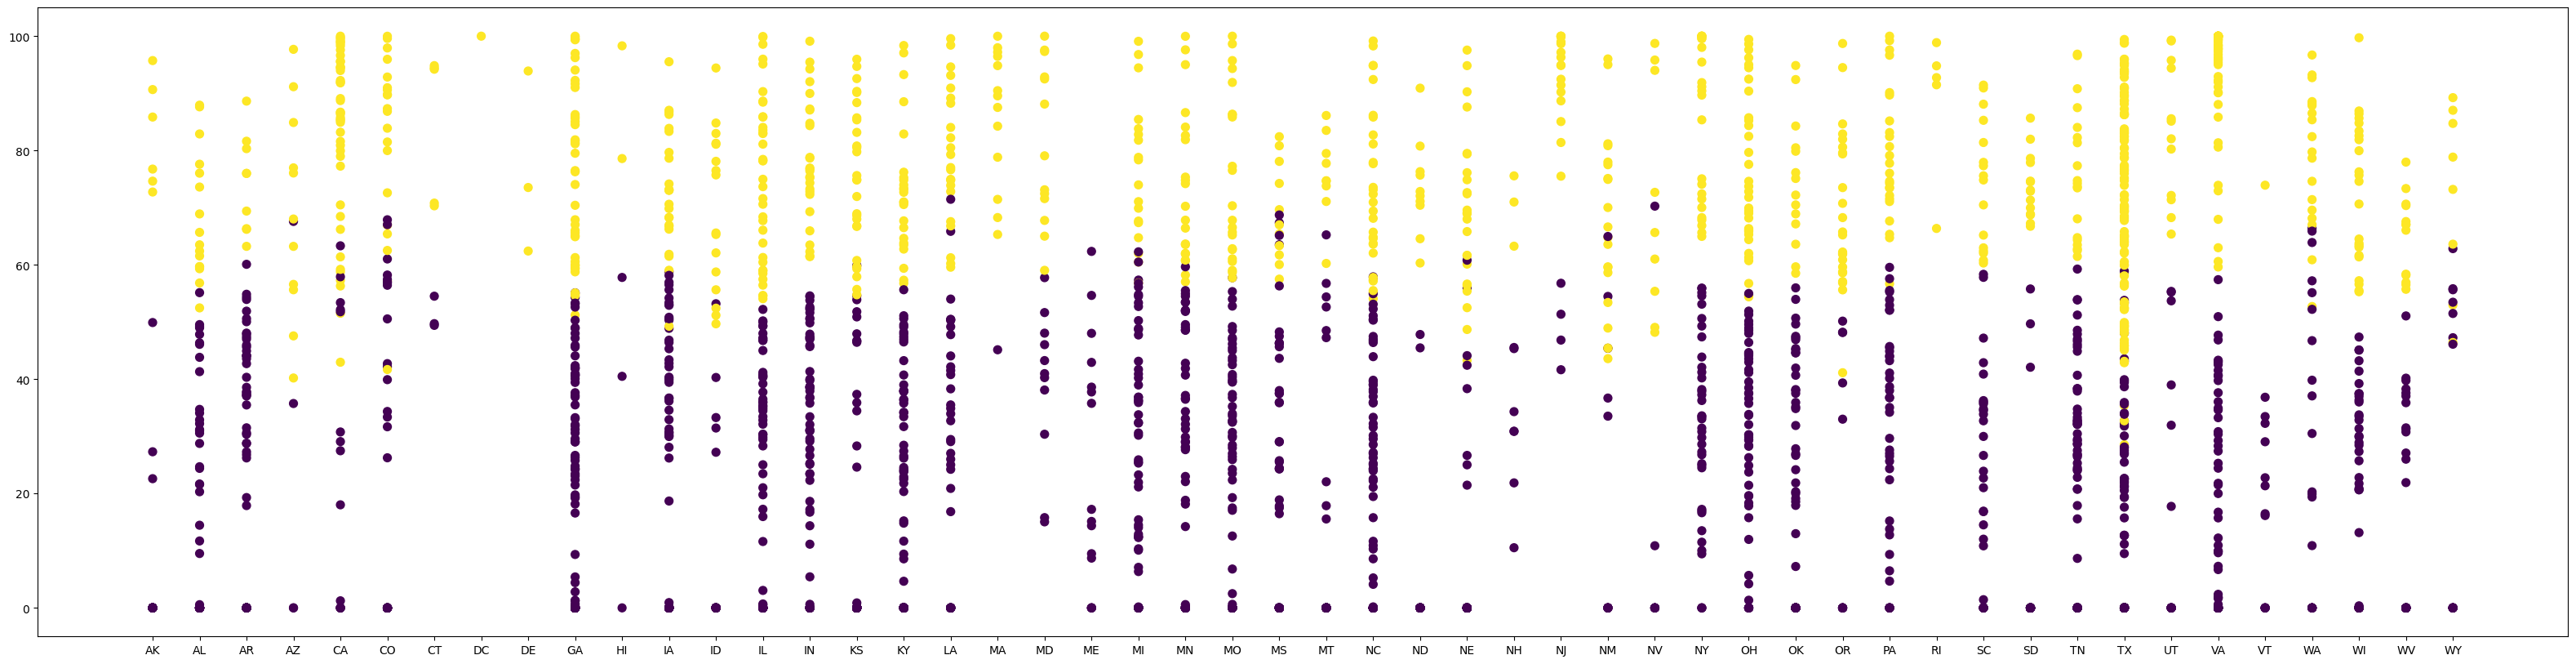

In [118]:
plt.figure(figsize=(40, 10))
# Plotting

plt.scatter(cdc_all['State'], cdc_all['Urban_Pop_Percent'], c=h_cluster.labels_, cmap='viridis',s=50)
plt.show()

In [99]:
hcluster_labels = h_cluster.fit_predict(cdc_cluster)
import sklearn.metrics as sklm
# These lines calculate the silhouette score...
silhouette_hcluster = sklm.silhouette_score(cdc_cluster, hcluster_labels)

# ... and print it:
print("Silhouette Score:", silhouette_hcluster, "Number of clusters", 2)

/home/mengyuwsl/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score: 0.30820480243832354 Number of clusters 2


## 4.3 GMM Gaussian Mixture Model

In [114]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cdc_cluster)

# Number of clusters
nclusters_GMM = 2

# Create GMM instance
gmm_Places = GaussianMixture(n_components=nclusters_GMM, random_state=42)

# Fit the model
gmm_Places.fit(data_scaled)

# Assign a cluster to each data point
labels_GMM = gmm_Places.predict(data_scaled)

import sklearn.metrics as sklm

# These lines calculate the silhouette score...
silhouette_GMM = sklm.silhouette_score(cdc_cluster, labels_GMM)

# ... and print it:
print("Silhouette Score:", silhouette_hcluster, "Number of clusters", nclusters_GMM)

Silhouette Score: 0.41140403037422174 Number of clusters 2


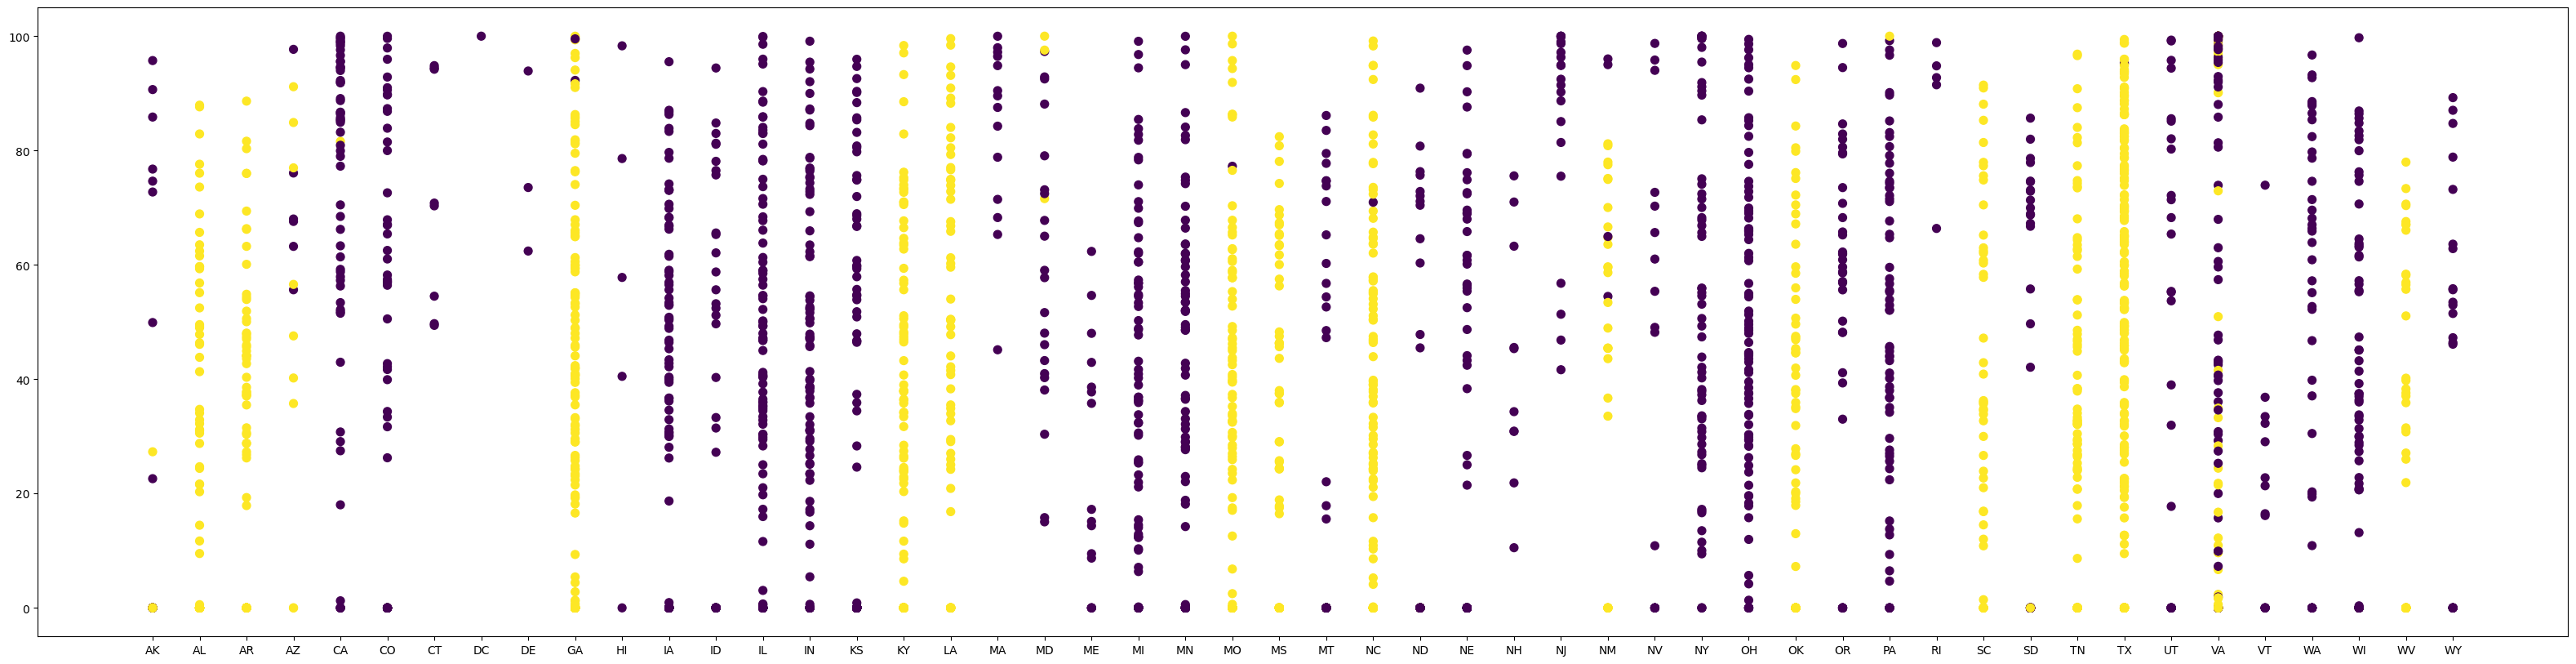

In [119]:
plt.figure(figsize=(40, 10))
# Plotting
plt.scatter(cdc_all['State'], cdc_all['Urban_Pop_Percent'], c=labels_GMM, cmap='viridis',s=50)
#plt.scatter(cdc_all['State'], cdc_all['Coronary heart disease among adults aged >=18 years'], c=labels_GMM, cmap='viridis',s=50)
plt.show()

__PCA and other methods are not improving the clustering, and the project has shifted focus on regression methods.__

Remark:

Building a forecasting/prediction model to analyze the change in health outcomes when interventions on population are introduced e.g. policy interventions.

Clustering on Services:

In [ ]:
cdc_kMeans_HO_cluster = kmeans_health.labels_
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(cdc_health_outcomes, cdc_20_21['KMeans_Health_Outcome_cluster'])

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

## 4.4 PCA and other methods to improve cluster performance
After running a simple K-means analysis, the results indicates that a PCA is needed.

In [15]:
from sklearn.decomposition import PCA

In [16]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cdc_20_21_new)

# Initialize PCA - Here, we're choosing to keep 10 components
pca = PCA(n_components=10)

# Fit PCA on the standardized data and transform the data
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result)

# Explained variance ratio
print(pca.explained_variance_ratio_)



[0.57499772 0.12712756 0.069661   0.0512198  0.03042347 0.02683648
 0.01957679 0.01447657 0.01052207 0.00901428]


In [17]:
pca_df

,0,1,2,3,4,5,6,7,8,9
0,-0.923362,9.834822,1.355002,-1.171263,0.050953,-0.833552,-0.137594,-2.005434,-1.288181,1.642374
1,-4.993415,9.156221,1.603447,-0.348518,-0.052055,-1.624518,0.146107,-1.922545,-0.850707,1.179285
2,-5.963018,4.777293,0.082240,1.617665,0.455914,-0.013704,0.159262,-0.769606,0.093813,0.276777
3,11.122738,10.251372,-2.509567,2.382421,3.699258,1.594785,0.764078,0.332113,0.161919,-0.696617
4,-3.004177,4.938847,-1.516660,0.188305,0.571232,1.154215,1.210253,-0.437510,-0.041439,-0.362304
...,...,...,...,...,...,...,...,...,...,...
3071,-3.357888,4.111041,-0.497788,0.562698,0.240819,-0.548010,0.868126,-1.621412,-0.180763,-0.317702
3072,-9.779254,2.586629,0.409171,0.201463,-0.155806,1.097183,0.259091,0.157113,-0.984334,-0.303016
3073,-3.077341,4.450180,-0.736844,0.585495,-0.072673,0.103726,1.658188,-1.405341,-0.307187,0.249335
3074,-2.557613,3.770433,-1.510226,-1.128252,-0.902490,0.685434,1.196363,-1.633601,0.299058,-0.322269


In [22]:
kmeans_afterPCA = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(pca_df)
kmeans_afterPCA.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [23]:
cdc_kMeans_cluster2 = kmeans_afterPCA.labels_
# These lines calculate the silhouette score...
silhouette_kmeans2 = sklm.silhouette_score(pca_df,kmeans_afterPCA.labels_)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.2532805308976713


In [28]:
cdc_20_21['State'] = cdc_20_21['Location'].str.split('_').str[0]

In [29]:
cdc_20_21['State']

0       AK
1       AK
2       AK
3       AK
4       AK
        ..
3071    WY
3072    WY
3073    WY
3074    WY
3075    WY
Name: State, Length: 3076, dtype: object

Text(0, 0.5, 'CHD Prevalence')

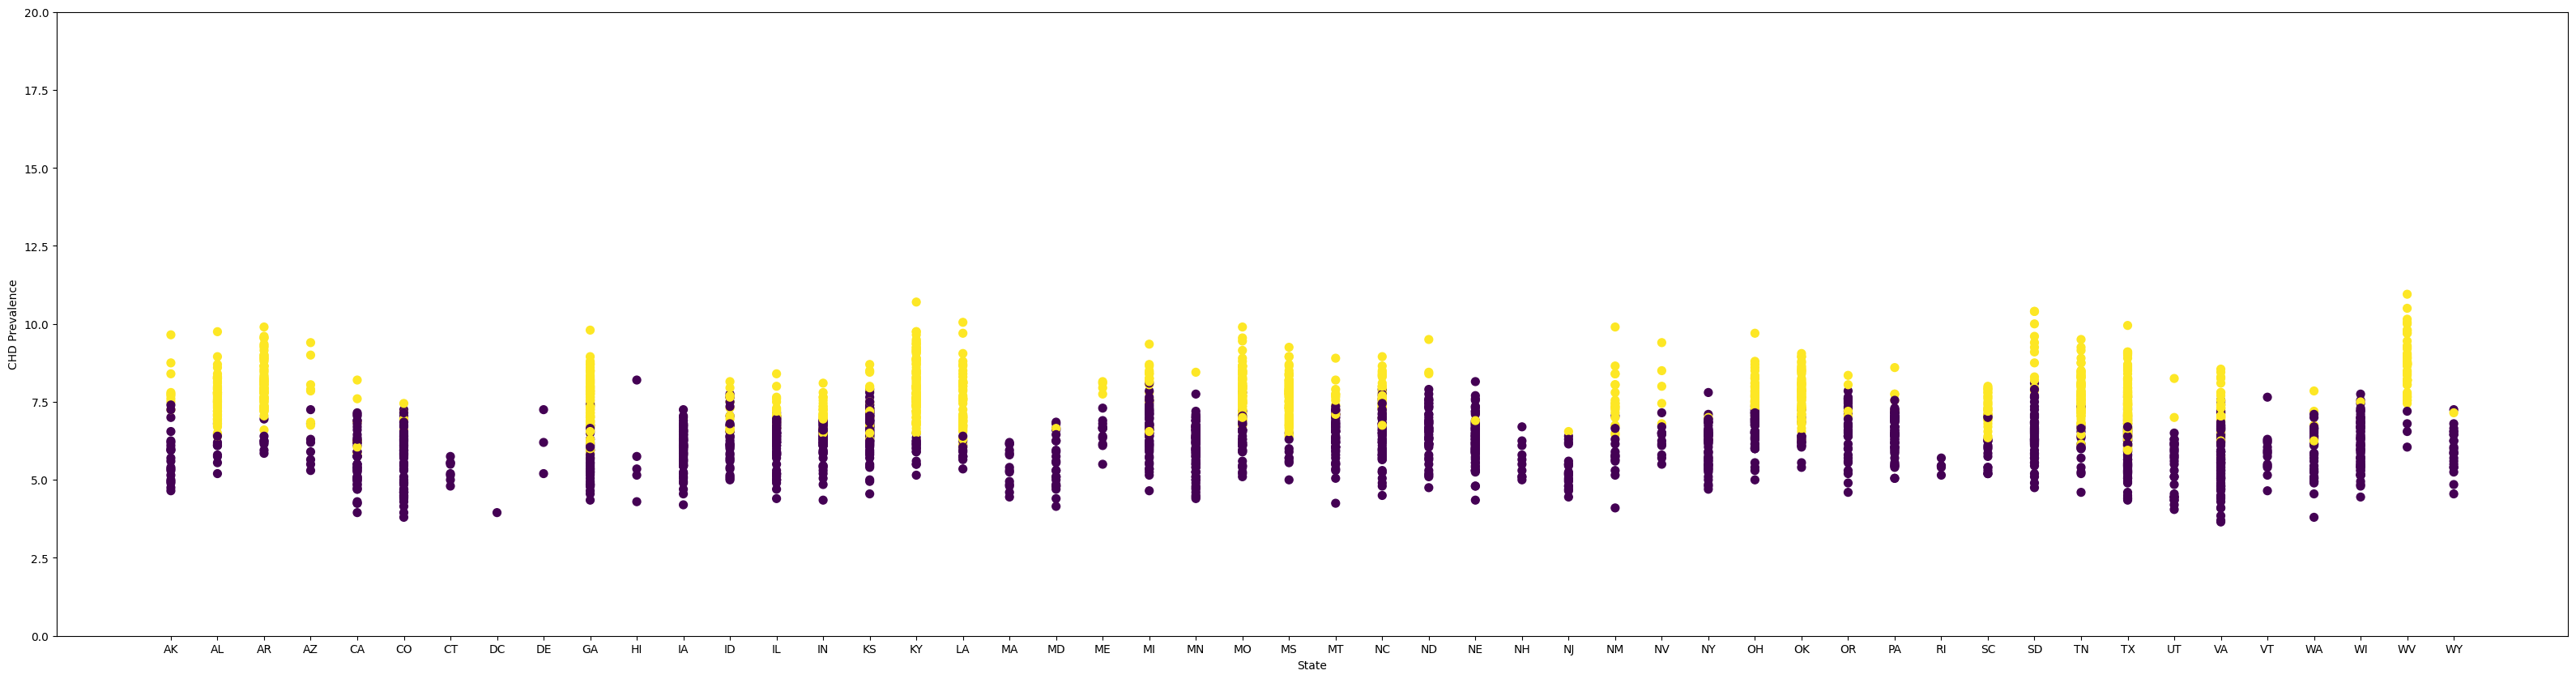

In [39]:
plt.figure(figsize=(40, 10))

plt.scatter(cdc_20_21['State'], cdc_20_21['Coronary heart disease among adults aged >=18 years'], c=kmeans_afterPCA.labels_,cmap='viridis',s=50)

plt.ylim(0, 20)
plt.xlabel('State')
plt.ylabel('CHD Prevalence')

In [ ]:
cdc_health_outcomes.columns

#### DBSCAN 

#### Spectral Cluster

## Superseded Code

In [ ]:
cdc_risks = cdc_20_21_new.drop(columns=[ 'All teeth lost among adults aged >=65 years',
       'Cervical cancer screening among adult women aged 21-65 years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
       'Mammography use among women aged 50-74 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
       'Visits to dentist or dental clinic among adults aged >=18 years',
    	'Any disability among adults aged >=18 years',
       'Arthritis among adults aged >=18 years',
       'Cancer (excluding skin cancer) among adults aged >=18 years',
       'Cholesterol screening among adults aged >=18 years',
       'Chronic kidney disease among adults aged >=18 years',
       'Chronic obstructive pulmonary disease among adults aged >=18 years',
       'Cognitive disability among adults ages >=18 years',
       'Coronary heart disease among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Current lack of health insurance among adults aged 18-64 years',
       'Depression among adults aged >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Fair or poor self-rated health status among adults aged >=18 years',
       'Hearing disability among adults aged >=18 years',
       'High blood pressure among adults aged >=18 years',
       'High cholesterol among adults aged >=18 years who have been screened in the past 5 years',
       'Independent living disability among adults aged >=18 years',
       'Mental health not good for >=14 days among adults aged >=18 years',
       'Mobility disability among adults aged >=18 years',
       'Obesity among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18 years',
       'Self-care disability among adults aged >=18 years',
       'Stroke among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure',
       'Vision disability among adults aged >=18 years',
       'Visits to doctor for routine checkup within the past year among adults aged >=18 years'])

### Kmeans and Silouette score

In [ ]:
cdc_pservices = cdc_20_21_new.drop(columns=[ 'All teeth lost among adults aged >=65 years',
       'Sleeping less than 7 hours among adults aged >=18 years',
	'Any disability among adults aged >=18 years',
       'Arthritis among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Cancer (excluding skin cancer) among adults aged >=18 years',
       'Chronic kidney disease among adults aged >=18 years',
       'Chronic obstructive pulmonary disease among adults aged >=18 years',
       'Cognitive disability among adults ages >=18 years',
       'Coronary heart disease among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Current lack of health insurance among adults aged 18-64 years',
       'Current smoking among adults aged >=18 years',
       'Depression among adults aged >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Fair or poor self-rated health status among adults aged >=18 years',
       'Hearing disability among adults aged >=18 years',
       'High blood pressure among adults aged >=18 years',
       'High cholesterol among adults aged >=18 years who have been screened in the past 5 years',
       'Independent living disability among adults aged >=18 years',
       'Mental health not good for >=14 days among adults aged >=18 years',
       'Mobility disability among adults aged >=18 years',
       'No leisure-time physical activity among adults aged >=18 years',
       'Obesity among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18 years',
       'Self-care disability among adults aged >=18 years',
       'Stroke among adults aged >=18 years',
       'Vision disability among adults aged >=18 years'])

cdc_health_outcomes = cdc_20_21_new.drop(columns=[ 'Cervical cancer screening among adult women aged 21-65 years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
       'Mammography use among women aged 50-74 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
       'Sleeping less than 7 hours among adults aged >=18 years',
       'Visits to dentist or dental clinic among adults aged >=18 years',
       'Any disability among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Current smoking among adults aged >=18 years',
       'Cholesterol screening among adults aged >=18 years',
       'Chronic kidney disease among adults aged >=18 years',
       'Chronic obstructive pulmonary disease among adults aged >=18 years',
       'Cognitive disability among adults ages >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Fair or poor self-rated health status among adults aged >=18 years',
       'Hearing disability among adults aged >=18 years',
       'Independent living disability among adults aged >=18 years',
       'Mobility disability among adults aged >=18 years',
       'No leisure-time physical activity among adults aged >=18 years',
       'Self-care disability among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure',
       'Vision disability among adults aged >=18 years',
       'Visits to doctor for routine checkup within the past year among adults aged >=18 years'])

In [ ]:
from sklearn.cluster import KMeans

kmeans_all = KMeans(n_clusters= 6, random_state=59000, n_init="auto").fit(cdc_cluster)
kmeans_all.labels_
cdc_all['KMeans_2_cluster'] = kmeans_all.labels_

import sklearn.metrics as sklm
#cdc_kMeans_HO_cluster = kmeans_all.labels_
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(cdc_cluster, cdc_all['KMeans_2_cluster'])

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

In [ ]:
plt.figure(figsize=(40, 10))

plt.scatter(cdc_all['State'], cdc_all['Coronary heart disease among adults aged >=18 years'], c= kmeans_all.labels_,cmap='viridis',s=50)

#plt.xlim(2, 15)
#plt.ylim(-5, 105) 
plt.ylim(2, 13) 
plt.xlabel('State')
#plt.xlabel('CHD Prevalence')
plt.ylabel('CHD Prevalence')
#plt.ylabel('Urban Pop Percentage')

In [ ]:
plt.figure(figsize=(40, 10))

plt.scatter(cdc_all['Coronary heart disease among adults aged >=18 years'], cdc_all['Urban_Pop_Percent'], c= kmeans_all.labels_,cmap='viridis',s=50)

plt.xlim(2, 13)
plt.ylim(-5, 105)
#plt.xlabel('State')
plt.xlabel('CHD Prevalence')
#plt.ylabel('CHD Prevalence')
plt.ylabel('Urban Pop Percentage')

In [ ]:
from sklearn.cluster import KMeans

kmeans_all_3 = KMeans(n_clusters= 3, random_state=59000, n_init="auto").fit(cdc_cluster)
kmeans_all_3.labels_
cdc_all['KMeans_3_cluster'] = kmeans_all_3.labels_
import sklearn.metrics as sklm
#cdc_kMeans_HO_cluster = kmeans_all.labels_
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(cdc_cluster, cdc_all['KMeans_3_cluster'])

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

In [ ]:
kmeans_ps = KMeans(n_clusters= 3, random_state=64000, n_init= 200,algorithm='elkan').fit(cdc_pservices) #, n_init="auto"
kmeans_ps.labels_
cdc_20_21['KMeans_PS_cluster'] = kmeans_ps.labels_
cdc_kMeans_HO_cluster = kmeans_ps.labels_
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(cdc_pservices, cdc_20_21['KMeans_PS_cluster'])

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

plt.figure(figsize=(40, 10))

plt.scatter(cdc_20_21['State'], cdc_20_21['Coronary heart disease among adults aged >=18 years'], c=kmeans_afterPCA.labels_,cmap='viridis',s=50)

plt.ylim(0, 20)
plt.xlabel('State')
plt.ylabel('CHD Prevalence')